In [7]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [8]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "ann"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# ANN With Keras


If the training instances are linearly separable, the perceptron algorithm will converge (*perceptron convergence theorem*)! Where perceptron is fed one training instances one a time, and for each instances it makes its predictions. For every output neuron that produced a wrong prediction, it reinforces the connection weights from the inputs that would have contributed to the correct prediction.


$w_{i, j} ^{(next step)} = w_{i, j} + η(y_j− \hat{y}_j) x_i$

• $w_{i, j}$ is the connection weight between the $i^{th}$ input and the $j^{th}$ neuron. <br>
• $x_i$ is the $i^{th}$ input value of the current training instance.<br>
• $\hat{y}_j$ is the output of the $j^{th}$ output neuron for the current training instance.<br>
• $y_j$ is the target output of the $j^{th}$ output neuron for the current training instance.<br>
• $η$ is the learning rate

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0) # iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X,y)

X_new = [[2, 0.5], [3,1]]
y_pred = per_clf.predict(X_new)

*feedforward neural network*: NN Architecture where the signal flows only in 1 direction

*deep neural network*: ANN containing a deep stack of hiddne layers

*backpropagation*: combination of reverse-mode autodiff (algorithm to compute all gradients by passing through the network twice (forward and backward)) and gradient descent.

In short, backpropagation makes predictions for a mini-batch (forward pass), measures the error, then goes through each layer in reverse to measure the error contribution from each parameter (reverse pass), and finally tweaks the connection weights and biases to reduce the error (gradient descent step).

Backpropagation can only work with functions that have well-defined nonzero derivative everywhere such as the logistic / sigmoid function and:
- Hyperbolic tangent function; tanh(z) = 2σ(2z) – 1 <br>
Output ranges from -1 to 1, instead of 0 to 1 for sigmoid.


- Rectified Linear Unit function (ReLU); ReLU(z) = max(0, z) <br>
Continuous but not differentiable at z = 0 with derivative = 0 for z < 0.

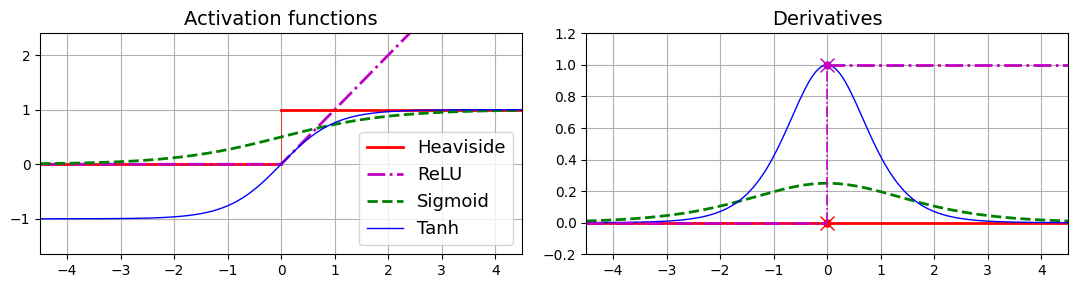

In [9]:
# extra code – this cell generates and saves Figure 10–8

from scipy.special import expit as sigmoid

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

plt.figure(figsize=(11, 3.1))

plt.subplot(121)
plt.plot([-max_z, 0], [0, 0], "r-", linewidth=2, label="Heaviside")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.plot([0, 0], [0, 1], "r-", linewidth=0.5)
plt.plot([0, max_z], [1, 1], "r-", linewidth=2)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=1, label="Tanh")
plt.grid(True)
plt.title("Activation functions")
plt.axis([-max_z, max_z, -1.65, 2.4])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Heaviside")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=1, label="Tanh")
plt.plot([-max_z, 0], [0, 0], "m-.", linewidth=2)
plt.plot([0, max_z], [1, 1], "m-.", linewidth=2)
plt.plot([0, 0], [0, 1], "m-.", linewidth=1.2)
plt.plot(0, 1, "mo", markersize=5)
plt.plot(0, 1, "mx", markersize=10)
plt.grid(True)
plt.title("Derivatives")
plt.axis([-max_z, max_z, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

## Regression MLPs

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42    
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42
    )
# 3 hidden layers, each with 50 neurons
mlp_reg = MLPRegressor(hidden_layer_sizes=[50,50,50], random_state=42)

pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)

In [5]:
rmse

0.5053326657968678

Consider the *Huber loss* when there is a lot of outlier in the training set as it is quadratic when the errors is smaller than a threhold, but linear when the error is larger than the threshold. Unfortunately MLPRgressor only supports MSE.

Hyperparameter // Typical value <br>
\# hidden layers // Depends on the problem, but typically 1 to 5 <br>
\# neurons per hidden layer // Depends on the problem, but typically 10 to 100 <br>
\# output neurons // 1 per prediction dimension <br>
Hidden activation // ReLU <br>
Output activation // None, or ReLU/softplus (if positive outputs) or sigmoid/tanh (if bounded outputs) <br>
Loss function // MSE, or Huber if outliers <br>

## Classification MLPs

For classification, the number of output neuron = # of binary outputs you want.
E.g. for multi class classification of email for ham or spam and urgent & non urgent, there will be 2 output neurons, 1 for ham / spam and another for urgent / nonurgent. 

If each instance only belong to a single class, then you need to have one neuron per class and use the softmax activation function (ensures that all estimated probability are between 0 and 1) for the wholen output layer.

A good choice for loss is the cross-entropy loss.

Hyperparameter //  Binary classification // Multilabel binary classification // Multiclass classification <br>
\# hidden layers // Typically 1 to 5 layers, depending on the task <br>
\# output neurons // 1 // 1 per binary label // 1 per class <br>
Output layer activation // Sigmoid // Sigmoid // Softmax <br>
Loss function // X-entropy // X-entropy // X-entropy <br>

In [10]:
# extra code – this was left as an exercise for the reader

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
accuracy

1.0

## Implementing MLPs with Keras

Keras is TensorFlow's high level deep learning API, allows us to build, train, evaluate, and execute all sorts of neural networks.

### Building an Image Classifier using the Sequential API

#### Using Keras to load the dataset

In [12]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [13]:
X_train.shape

(55000, 28, 28)

In [14]:
X_train.dtype

dtype('uint8')

In [15]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [17]:
class_names[y_train[0]]

'Ankle boot'

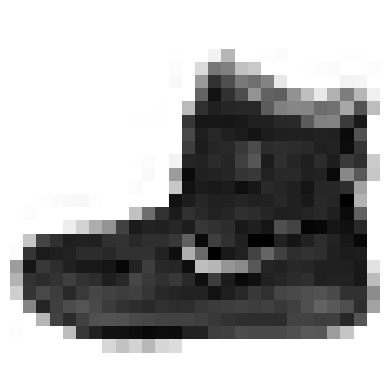

In [ ]:
# extra code to show the image
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

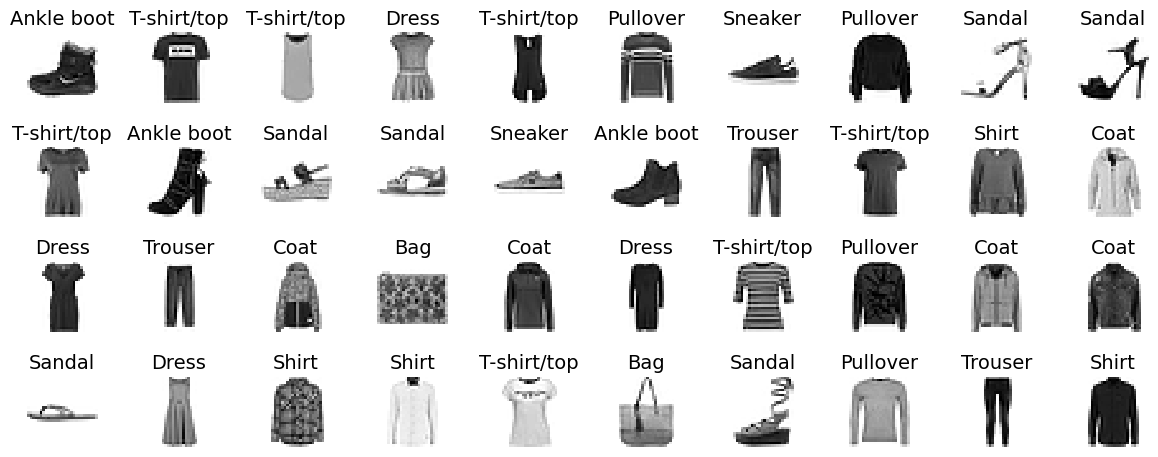

In [ ]:
# extra code – this cell generates and saves Figure 10–10
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

save_fig("fashion_mnist_plot")
plt.show()

#### Create the model using the Sequential API

In [ ]:
tf.keras.backend.clear_session()
# can also use tf.kreas.utils.set_random_seed()
tf.random.set_seed(42)
# Creates a Sequential model aka Sequential API
model = tf.keras.Sequential()
# The first layer containing the shape of the inputs
model.add(tf.keras.layers.Input(shape=[28,28]))
# Preprocessing step to flatten the input layer
model.add(tf.keras.layers.Flatten())
# Add a Dense hidden layer with 300 neurons with ReLU activation function
model.add(tf.keras.layers.Dense(300, activation = "relu"))
# Add second Dense hidden layer with 100 neurons, with the ReLU activation function
model.add(tf.keras.layers.Dense(100, activation = "relu"))
# Add a Dense output layer with 10 neurons (one per class) 
# with the softmax activation function since all the classes are exclusive
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

In [ ]:
# # The model above can also be written like below
# model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=[28, 28]),
#     tf.keras.layers.Dense(300, activation="relu"),
#     tf.keras.layers.Dense(100, activation="relu"),
#     tf.keras.layers.Dense(10, activation="softmax")
# ])

/Users/kevinkyhalim/ML_repo/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [29]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [30]:
model.get_layer('dense') is hidden1

True

In [31]:
weights, biases = hidden1.get_weights()
weights

array([[-0.01904866, -0.03338058, -0.02147302, ...,  0.01860334,
         0.05398433,  0.02029141],
       [ 0.06139213,  0.01550989,  0.05372897, ...,  0.03824008,
        -0.06039718,  0.02450733],
       [-0.004286  , -0.03767818, -0.05798728, ..., -0.00211318,
        -0.01839117, -0.01941678],
       ...,
       [-0.03806036,  0.06443501,  0.03536364, ...,  0.02132667,
         0.00733346,  0.01062091],
       [-0.00244009, -0.0720184 ,  0.05342942, ...,  0.04693825,
         0.01753066, -0.01448172],
       [-0.01465996,  0.00338374,  0.02018135, ..., -0.00455077,
        -0.03588168, -0.06286488]], shape=(784, 300), dtype=float32)

In [32]:
weights.shape

(784, 300)

In [33]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [34]:
biases.shape

(300,)

In [38]:
# Compiling the model
# the loss function below is the same as
# loss = tf.keras.losses.sparse_categorical_crossentropy
# optimizer = tf.keras.optimizers.SGD()
# metrics = [tf.keras.metrics.sparse_categorical_accuracy]
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics=["accuracy"])

"`sparse_categorical crossentropy`" is used because we have sparse labels (for each instance, there is just a target class index, from 0 to 9 in this case) and the classes are exclusive.

If we had one target probability per class for each instance (i.e. one-hot vectors to represent a class), then need to use "`categorical_crossentropy`".

If using binary / multilabel binary classification, then use the "`sigmoid`" instead of "`softmax`" activation function. And we would also use the "`binary_crossentropy`" loss.

When using the `sgd` optimizer, tuning the learning rate is important and we generally want to use optimizer = tf.keras.optimizers.SGD(learning_rate = __) to set the learning rate. If not then the learning rate defaults to 0.01.

#### Training & Evaluating

In [39]:
# validation data is optional
history = model.fit(X_train, y_train, epochs=30,
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6922 - loss: 0.9670 - val_accuracy: 0.8314 - val_loss: 0.4962
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8294 - loss: 0.4961 - val_accuracy: 0.8400 - val_loss: 0.4490
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8469 - loss: 0.4443 - val_accuracy: 0.8498 - val_loss: 0.4266
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8566 - loss: 0.4151 - val_accuracy: 0.8536 - val_loss: 0.4116
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8639 - loss: 0.3945 - val_accuracy: 0.8592 - val_loss: 0.4029
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8689 - loss: 0.3783 - val_accuracy: 0.8608 - val_loss: 0.3951
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8730 - loss: 0.3647 - val_accuracy: 0.8610 - val_loss: 0.3892
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8764 - loss: 0.3530 - 

Watch out for the accuracy between training and validation.

Shape errors are also quite common.

If the training set was very skewed, with some classes being overrepresented and others underrepresented, it would be useful to set the `class_weight` argument when calling the `fit()` method, to give a larger weight to underrepresented classes and a lower weight to overrepresented classes.
These weights would be used by Keras when computing the loss. If you need per-instance weights, set the `sample_weight` argument. If both `class_weight` and `sample_weight` are provided, then Keras multiplies them. Per-instance weights could be useful, for example, if some instances were labeled by experts while others were labeled using a crowdsourcing platform: you might want to give more weight to the former. You can also provide sample weights (but not class weights) for the validation set by adding them as a third item in the `validation_data` tuple.

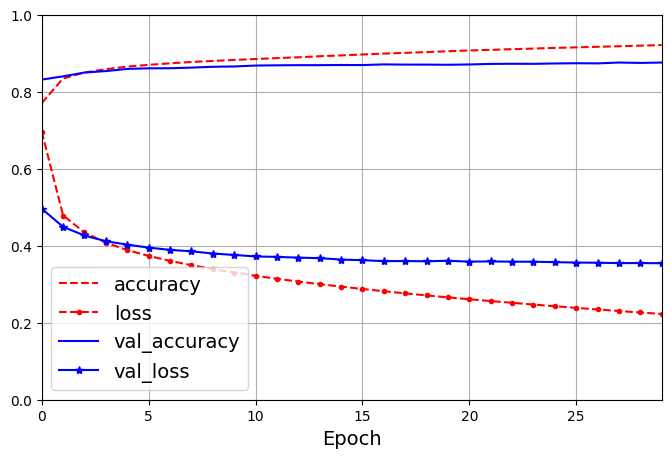

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize = (8,5),
    xlim = [0,29],
    ylim = [0,1],
    grid = True,
    xlabel = "Epoch",
    style = ["r--", "r--.", "b-", "b-*"]
)
plt.show()

Things to do / tune further:
1. call the `fit()` method again to continue the training.
2. Tune the learning rate
3. Change the optimizer (and always retune the learning rate after changing 2.)
4. Tune model hyperparameters such as number of layers, number of neurons per layer, and the types of activation functions used at each hidden layer.
5. Tune other hypeparameter such as batchsize

In [42]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.8747 - loss: 0.3672


[0.36665061116218567, 0.8733999729156494]

#### Using the model to make predictions

In [43]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.47, 0.  , 0.01, 0.  , 0.53],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [44]:
import numpy as np
y_pred = y_proba.argmax(axis = -1)
y_pred

array([9, 2, 1])

In [45]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

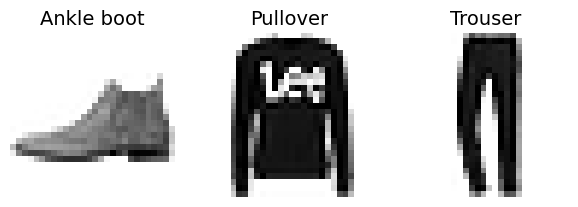

In [46]:
# extra code – this cell generates and saves Figure 10–12
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

### Building a Regression MLP Using Sequential API

Tackling the California housing problem with MLP

In [47]:
# extra code – load and split the California housing dataset, like earlier
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [ ]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape = X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)
model.compile(loss="mse", optimizer = optimizer, metrics=["RootMeanSquaredError"])
# to learn the feature means and standard deviations in the training data
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs = 20,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20


/Users/kevinkyhalim/ML_repo/.venv/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 1.2744 - loss: 1.7643 - val_RootMeanSquaredError: 0.6661 - val_loss: 0.4436
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - RootMeanSquaredError: 0.6360 - loss: 0.4049 - val_RootMeanSquaredError: 0.7593 - val_loss: 0.5766
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - RootMeanSquaredError: 0.6064 - loss: 0.3680 - val_RootMeanSquaredError: 1.1761 - val_loss: 1.3833
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - RootMeanSquaredError: 0.5926 - loss: 0.3514 - val_RootMeanSquaredError: 1.3101 - val_loss: 1.7164
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - RootMeanSquaredError: 0.5847 - loss: 0.3420 - val_RootMeanSquaredError: 1.8355 - val_loss: 3.3689
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - RootMeanSquaredError: 0.5829 - loss: 0.3399 - val_RootMeanSquaredError: 2.2199 - val_loss: 4.9280
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - RootMeanSquaredError: 0.5800 - lo

In [51]:
rmse_test

0.5397660732269287

In [52]:
y_pred

array([[0.43186736],
       [1.0271487 ],
       [5.1374207 ]], dtype=float32)

### Building Complex Models using the Functional API

In [61]:
# extra code – reset the name counters and make the code reproducible
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [62]:
# Create 5 layers, 1 normalization, 2 dense, 1 concatenate and 1 output
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation = "relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation = "relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)
# create an Input object
input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
# Use the normalization layer like a function and passes the input object
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs =[input_], outputs=[output])

In [63]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 8)         │         17 │ input_layer[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 30)        │        270 │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 30)        │        930 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ normalization[0]… │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

In [64]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 1.5387 - loss: 2.5017 - val_RootMeanSquaredError: 1.9190 - val_loss: 3.6825
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - RootMeanSquaredError: 0.7104 - loss: 0.5061 - val_RootMeanSquaredError: 0.6140 - val_loss: 0.3770
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - RootMeanSquaredError: 0.6378 - loss: 0.4071 - val_RootMeanSquaredError: 0.6350 - val_loss: 0.4033
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - RootMeanSquaredError: 0.6209 - loss: 0.3857 - val_RootMeanSquaredError: 0.5894 - val_loss: 0.3474
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - RootMeanSquaredError: 0.6109 - loss: 0.3735 - val_RootMeanSquaredError: 0.5836 - val_loss: 0.3406
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - RootMeanSquaredError: 0.6038 - loss: 0.3648 - val_RootMeanSquaredError: 0.5771 - val_loss: 0.3330
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - RootMeanSquaredError: 

In [70]:
# To send different features through the deep and wide paths

input_wide = tf.keras.layers.Input(shape=[5]) # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6]) # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [74]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer = optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:,:5], X_train[:,2:]
X_valid_wide, X_valid_deep = X_valid[:,:5], X_valid[:,2:]
X_test_wide, X_test_deep = X_test[:,:5], X_test[:,2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

# adapt for normalization
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                     validation_data = ((X_valid_wide, X_valid_deep), y_valid))
rmse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - RootMeanSquaredError: 0.5834 - loss: 0.3404 - val_RootMeanSquaredError: 1.4076 - val_loss: 1.9813
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - RootMeanSquaredError: 0.5761 - loss: 0.3320 - val_RootMeanSquaredError: 1.4643 - val_loss: 2.1441
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - RootMeanSquaredError: 0.5761 - loss: 0.3319 - val_RootMeanSquaredError: 1.7590 - val_loss: 3.0942
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - RootMeanSquaredError: 0.5760 - loss: 0.3318 - val_RootMeanSquaredError: 1.7686 - val_loss: 3.1279
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - RootMeanSquaredError: 0.5778 - loss: 0.3340 - val_RootMeanSquaredError: 1.4997 - val_loss: 2.2491
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - RootMeanSquaredError: 0.5716 - loss: 0.3268 - val_RootMeanSquaredError: 1.0300 - val_loss: 1.0610
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - RootMeanSquaredError

In [75]:
rmse_test 

[0.3128463923931122, 0.559326708316803]

In [73]:
y_pred

array([[0.49670023],
       [1.3032367 ],
       [3.5617723 ]], dtype=float32)

#### Adding an auxiliary output for regularization

In [82]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [83]:
input_wide = tf.keras.layers.Input(shape=[5]) # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6]) # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep], 
                       outputs=[output, aux_output])

In [84]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=["RootMeanSquaredError", "RootMeanSquaredError"])

In [85]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - dense_2_RootMeanSquaredError: 1.3087 - dense_2_loss: 1.7975 - dense_3_RootMeanSquaredError: 2.1635 - dense_3_loss: 4.8022 - loss: 2.0979 - val_dense_2_RootMeanSquaredError: 1.1063 - val_dense_2_loss: 1.2234 - val_dense_3_RootMeanSquaredError: 2.0499 - val_dense_3_loss: 4.2003 - val_loss: 1.5217
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - dense_2_RootMeanSquaredError: 0.7104 - dense_2_loss: 0.5051 - dense_3_RootMeanSquaredError: 0.9829 - dense_3_loss: 0.9671 - loss: 0.5513 - val_dense_2_RootMeanSquaredError: 0.7346 - val_dense_2_loss: 0.5395 - val_dense_3_RootMeanSquaredError: 1.2193 - val_dense_3_loss: 1.4862 - val_loss: 0.6344
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - dense_2_RootMeanSquaredError: 0.6733 - dense_2_loss: 0.4536 - dense_3_RootMeanSquaredError: 0.8232 - dense_3_loss: 0.6779 - loss: 0.4761 - val_dense_2_RootMeanSquaredError: 0.6907 - val_dense_2_loss: 0.4769 - val_dense_3_RootMeanSquaredError: 0.8395 -

In [86]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss = eval_results[:3]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - dense_2_RootMeanSquaredError: 0.5778 - dense_2_loss: 0.3339 - dense_3_RootMeanSquaredError: 0.6403 - dense_3_loss: 0.4100 - loss: 0.3415


In [87]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


In [88]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [ ]:
y_pred
# dense_2 is the main prediction
# dense_3 is the auxiliary prediction

{'dense_2': array([[0.39340925],
        [1.2870213 ],
        [3.561396  ]], dtype=float32),
 'dense_3': array([[0.53360337],
        [1.2049452 ],
        [3.2514644 ]], dtype=float32)}

### Using the Subclassing API to Build Dynamic Models

While it gives the users flexibility on how the model is being made, Keras can now not easily inpsect and cannot be cloned using the `tf.keras.models.clone_model()`. Keras also cannot check types and shapes ahead of time and it is easier to make mistakes.

In [90]:
class WideAndDeepModel(tf.keras.Model):
    # declare all the relevant layers
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # needed to support naming the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
    
    # declare how the layers are connected
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

model = WideAndDeepModel(30, activation="relu", name="my_cool_model")

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=["RootMeanSquaredError", "RootMeanSquaredError"])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)

history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))

eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))

y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - RootMeanSquaredError: 1.7263 - RootMeanSquaredError_1: 1.7511 - loss: 3.0827 - mse_loss: 3.1357 - val_RootMeanSquaredError: 1.1406 - val_RootMeanSquaredError_1: 1.4482 - val_loss: 1.3807 - val_mse_loss: 2.0966
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - RootMeanSquaredError: 0.8142 - RootMeanSquaredError_1: 0.9093 - loss: 0.6799 - mse_loss: 0.8280 - val_RootMeanSquaredError: 1.2095 - val_RootMeanSquaredError_1: 0.8821 - val_loss: 1.3945 - val_mse_loss: 0.7780
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - RootMeanSquaredError: 0.7274 - RootMeanSquaredError_1: 0.7843 - loss: 0.5379 - mse_loss: 0.6154 - val_RootMeanSquaredError: 0.8675 - val_RootMeanSquaredError_1: 0.7370 - val_loss: 0.7316 - val_mse_loss: 0.5431
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - RootMeanSquaredError: 0.6781 - RootMeanSquaredError_1: 0.7506 - loss: 0.4704 - mse_loss: 0.5635 - val_RootMeanSquaredError: 0.6915 - val_RootMeanS

### Saving & Restoring a Model

This part differs from the book (since the book still uses the TensorFlow SavedModel format).

Note that Keras now recommends using the .keras format to save models and the h5 format for weights. Refer to the website https://colab.research.google.com/github/ageron/handson-ml3/blob/main/10_neural_nets_with_keras.ipynb#scrollTo=wMtabR_kpKTl to check out the TensorFlow's SavedModel format

In [92]:
model.save("my_model.keras")

In [93]:
loaded_model = tf.keras.models.load_model(
    "my_model.keras",
    custom_objects={"WideAndDeepModel": WideAndDeepModel}
)

#### Using Callbacks

In [ ]:
# Keras now requires the checkpoint files to have a .weights.h5 extension
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints.weights.h5",
                                                   save_weights_only=True
# can add a "save_best_only = True" here
# to save the model when the performance on the validation set is the best so far
                                                   )
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - RootMeanSquaredError: 0.6040 - RootMeanSquaredError_1: 0.6598 - loss: 0.3720 - mse_loss: 0.4354 - val_RootMeanSquaredError: 1.3796 - val_RootMeanSquaredError_1: 1.2064 - val_loss: 1.8585 - val_mse_loss: 1.4547
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - RootMeanSquaredError: 0.5984 - RootMeanSquaredError_1: 0.6552 - loss: 0.3653 - mse_loss: 0.4293 - val_RootMeanSquaredError: 1.1530 - val_RootMeanSquaredError_1: 0.8512 - val_loss: 1.2689 - val_mse_loss: 0.7243
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - RootMeanSquaredError: 0.5899 - RootMeanSquaredError_1: 0.6438 - loss: 0.3547 - mse_loss: 0.4145 - val_RootMeanSquaredError: 0.7840 - val_RootMeanSquaredError_1: 0.7039 - val_loss: 0.6027 - val_mse_loss: 0.4953
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - RootMeanSquaredError: 0.5860 - RootMeanSquaredError_1: 0.6399 - loss: 0.3501 - mse_loss: 0.4096 - val_RootMeanSquaredError: 0.8928 - val_RootMeanS

In [95]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=100,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - RootMeanSquaredError: 0.5764 - RootMeanSquaredError_1: 0.6215 - loss: 0.3377 - mse_loss: 0.3864 - val_RootMeanSquaredError: 1.0813 - val_RootMeanSquaredError_1: 0.9452 - val_loss: 1.1417 - val_mse_loss: 0.8930
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - RootMeanSquaredError: 0.5751 - RootMeanSquaredError_1: 0.6186 - loss: 0.3360 - mse_loss: 0.3828 - val_RootMeanSquaredError: 1.2047 - val_RootMeanSquaredError_1: 0.9663 - val_loss: 1.3996 - val_mse_loss: 0.9334
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - RootMeanSquaredError: 0.5724 - RootMeanSquaredError_1: 0.6142 - loss: 0.3327 - mse_loss: 0.3774 - val_RootMeanSquaredError: 0.8072 - val_RootMeanSquaredError_1: 0.6574 - val_loss: 0.6296 - val_mse_loss: 0.4321
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - RootMeanSquaredError: 0.5708 - RootMeanSquaredError_1: 0.6124 - loss: 0.3308 - mse_loss: 0.3752 - val_RootMeanSquaredError: 0.9329 - val_RootM

Can combine both ModelCheckpoint and EarlyStopping

In [96]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"Epoch={epoch}, val/train={ratio:.2f}")

In [97]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[val_train_ratio_cb], verbose=0)

Epoch=0, val/train=3.18
Epoch=1, val/train=2.80
Epoch=2, val/train=3.92
Epoch=3, val/train=1.82
Epoch=4, val/train=2.58
Epoch=5, val/train=1.46
Epoch=6, val/train=2.17
Epoch=7, val/train=1.44
Epoch=8, val/train=3.37
Epoch=9, val/train=3.26


### Using TensorBoard for Visualization

In [98]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()

In [99]:
# extra code – builds the first regression model we used earlier
tf.keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

/Users/kevinkyhalim/ML_repo/.venv/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [100]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                                profile_batch=(100, 200))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/20


2025-05-13 23:52:00.110844: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2025-05-13 23:52:00.110911: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
2025-05-13 23:52:00.111820: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:130] Profiler session tear down.


286/363 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - RootMeanSquaredError: 1.8878 - loss: 3.6774

2025-05-13 23:52:00.653566: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2025-05-13 23:52:00.653585: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
2025-05-13 23:52:00.717538: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:68] Profiler session collecting data.
2025-05-13 23:52:00.741666: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:130] Profiler session tear down.
2025-05-13 23:52:00.745195: I external/local_xla/xla/tsl/profiler/rpc/client/save_profile.cc:147] Collecting XSpace to repository: my_logs/run_2025_05_13_23_51_49/train/plugins/profile/2025_05_13_23_52_00/Kevins-MacBook-Pro-2.local.xplane.pb


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 1.7876 - loss: 3.3216 - val_RootMeanSquaredError: 1.0557 - val_loss: 1.1146
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - RootMeanSquaredError: 0.9406 - loss: 0.8857 - val_RootMeanSquaredError: 0.8498 - val_loss: 0.7221
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - RootMeanSquaredError: 0.8719 - loss: 0.7611 - val_RootMeanSquaredError: 0.8002 - val_loss: 0.6404
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - RootMeanSquaredError: 0.8318 - loss: 0.6929 - val_RootMeanSquaredError: 0.7660 - val_loss: 0.5867
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - RootMeanSquaredError: 0.8012 - loss: 0.6428 - val_RootMeanSquaredError: 0.7399 - val_loss: 0.5474
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.7768 - loss: 0.6041 - val_RootMeanSquaredError: 0.7189 - val_loss: 0.5168
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - RootMeanSquaredError: 0.7570 - loss

In [101]:
print("my_logs")
for path in sorted(Path("my_logs").glob("**/*")):
    print("  " * (len(path.parts) - 1) + path.parts[-1])

my_logs
  run_2025_05_13_23_51_49
    train
      events.out.tfevents.1747151520.Kevins-MacBook-Pro-2.local.21483.0.v2
      plugins
        profile
          2025_05_13_23_52_00
            Kevins-MacBook-Pro-2.local.xplane.pb
    validation
      events.out.tfevents.1747151520.Kevins-MacBook-Pro-2.local.21483.1.v2


In [109]:
run_logdir_2 = get_run_logdir()
# extra code – builds the first regression model we used earlier
tf.keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(learning_rate=2e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

/Users/kevinkyhalim/ML_repo/.venv/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [110]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir_2,
                                                profile_batch=(100, 200))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/20


2025-05-14 00:00:32.965630: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2025-05-14 00:00:32.965655: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
2025-05-14 00:00:32.965831: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:130] Profiler session tear down.


281/363 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - RootMeanSquaredError: 1.5880 - loss: 2.6166

2025-05-14 00:00:33.371227: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2025-05-14 00:00:33.371247: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
2025-05-14 00:00:33.455814: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:68] Profiler session collecting data.
2025-05-14 00:00:33.479879: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:130] Profiler session tear down.
2025-05-14 00:00:33.480231: I external/local_xla/xla/tsl/profiler/rpc/client/save_profile.cc:147] Collecting XSpace to repository: my_logs/run_2025_05_14_00_00_29/train/plugins/profile/2025_05_14_00_00_33/Kevins-MacBook-Pro-2.local.xplane.pb


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 1.5028 - loss: 2.3562 - val_RootMeanSquaredError: 0.8943 - val_loss: 0.7998
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - RootMeanSquaredError: 0.8129 - loss: 0.6623 - val_RootMeanSquaredError: 0.7524 - val_loss: 0.5661
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - RootMeanSquaredError: 0.7673 - loss: 0.5900 - val_RootMeanSquaredError: 0.7166 - val_loss: 0.5135
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - RootMeanSquaredError: 0.7352 - loss: 0.5415 - val_RootMeanSquaredError: 0.6959 - val_loss: 0.4843
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - RootMeanSquaredError: 0.7111 - loss: 0.5064 - val_RootMeanSquaredError: 0.6832 - val_loss: 0.4668
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6929 - loss: 0.4808 - val_RootMeanSquaredError: 0.6753 - val_loss: 0.4561
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - RootMeanSquaredError: 0.6790 - loss

In [111]:
print("my_logs")
for path in sorted(Path("my_logs").glob("**/*")):
    print("  " * (len(path.parts) - 1) + path.parts[-1])

my_logs
  run_2025_05_13_23_51_49
    train
      events.out.tfevents.1747151520.Kevins-MacBook-Pro-2.local.21483.0.v2
      events.out.tfevents.1747151875.Kevins-MacBook-Pro-2.local.21483.2.v2
      plugins
        profile
          2025_05_13_23_52_00
            Kevins-MacBook-Pro-2.local.xplane.pb
          2025_05_13_23_57_55
            Kevins-MacBook-Pro-2.local.xplane.pb
    validation
      events.out.tfevents.1747151520.Kevins-MacBook-Pro-2.local.21483.1.v2
      events.out.tfevents.1747151875.Kevins-MacBook-Pro-2.local.21483.3.v2
  run_2025_05_14_00_00_29
    train
      events.out.tfevents.1747152032.Kevins-MacBook-Pro-2.local.21483.4.v2
      plugins
        profile
          2025_05_14_00_00_33
            Kevins-MacBook-Pro-2.local.xplane.pb
    validation
      events.out.tfevents.1747152033.Kevins-MacBook-Pro-2.local.21483.5.v2


In [112]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs
%reload_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 58981), started 0:08:02 ago. (Use '!kill 58981' to kill it.)

In [113]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        
        data = (np.random.randn(100) + 2) * step / 100  # gets larger
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        
        images = np.random.rand(2, 32, 32, 3) * step / 1000  # gets brighter
        tf.summary.image("my_images", images, step=step)
        
        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step=step)
        
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

In [114]:
# extra code – lists all running TensorBoard server instances

from tensorboard import notebook

notebook.list()

Known TensorBoard instances:
  - port 6006: logdir ./my_logs (started 0:14:41 ago; pid 58981)


In [118]:
!kill 58981

### Fine-Tuning Neural Network Hyperparameters

Use the *Keras Tuner* library, which is a hyperparameter tuning library for Keras models. It is highly customizable and has excellent integration with TensorBoard.

In [119]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [120]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [123]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

In [ ]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)

random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 15s]
val_accuracy: 0.8345999717712402

Best val_accuracy So Far: 0.8435999751091003
Total elapsed time: 00h 01m 23s


In [125]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [126]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values  # best hyperparameter values

{'n_hidden': 7,
 'n_neurons': 100,
 'learning_rate': 0.0012482904754698163,
 'optimizer': 'sgd'}

In [127]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 1 summary
Hyperparameters:
n_hidden: 7
n_neurons: 100
learning_rate: 0.0012482904754698163
optimizer: sgd
Score: 0.8435999751091003


In [128]:
best_trial.metrics.get_last_value("val_accuracy")

np.float64(0.8435999751091003)

In [129]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 978us/step - accuracy: 0.8688 - loss: 0.3540
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 977us/step - accuracy: 0.8741 - loss: 0.3400
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 984us/step - accuracy: 0.8765 - loss: 0.3289
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 962us/step - accuracy: 0.8811 - loss: 0.3180
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 963us/step - accuracy: 0.8852 - loss: 0.3095
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 957us/step - accuracy: 0.8879 - loss: 0.3010
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8899 - loss: 0.2942
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 965us/step - accuracy: 0.8932 - loss: 0.2875
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 951us/step - accuracy: 0.8953 - loss: 0.2818
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 970us/step - accuracy: 0.8968 - loss: 0.2760
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.8443 - loss: 0.4433


#### When you want to also fine-tiune data preprocessing hyperparameters, or model.fit() arguments, such as the batch size

In [ ]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)
    
    # takes a HyperParameters object and a compiled model as an argument
    # as well as all the model.fit() arguments
    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)

In [131]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory="my_fashion_mnist", project_name="hyperband")

In [132]:
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10,
                       validation_data=(X_valid, y_valid),
                       callbacks=[early_stopping_cb, tensorboard_cb])

Trial 60 Complete [00h 00m 18s]
val_accuracy: 0.8483999967575073

Best val_accuracy So Far: 0.8691999912261963
Total elapsed time: 00h 10m 18s


Check th HPARAMS tab to view the summary of all the hyperparameter combinations that were tried, along with the corresponding metrics.

Notice that there are 3 tabs, table view, parallel coordinates view and a scatterplot matrix view. 

Hyperband is smarter than pure random serach in the way it allocates resources, but at its core it still explores the hyperparameter spcae randomly. 

In [135]:
%load_ext tensorboard
%tensorboard --logdir {root_logdir}
%reload_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 59772), started 0:06:11 ago. (Use '!kill 59772' to kill it.)

In [145]:
!kill 59772

The tuner below gradually learns which regions of the hyperparameter space are most promising by fitting a probabilitistic model called a *Gaussian process*. This allows it to zoom in on the best hyperparameters. The downside is that the algorithm has its own hyperparameteres
- `alpha`: level of noise you expect in the performance measures across trials
- `beta`: how much you want the algorithm to explore, instead of simply exploiting the known good regions of hyperparameter space.

In [133]:
bayesian_opt_tuner = kt.BayesianOptimization(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_trials=10, alpha=1e-4, beta=2.6,
    overwrite=True, directory="my_fashion_mnist", project_name="bayesian_opt")
bayesian_opt_tuner.search(X_train, y_train, epochs=10,
                          validation_data=(X_valid, y_valid),
                          callbacks=[early_stopping_cb])

Trial 10 Complete [00h 00m 16s]
val_accuracy: 0.8324000239372253

Best val_accuracy So Far: 0.8592000007629395
Total elapsed time: 00h 02m 36s


Check out DeepMind's 2017 paper for evolutionary algorihtm to jointly optimize a population of models and their hyperparameters.
https://arxiv.org/abs/1711.09846

## Number of Hidden Layers

For many models, a single hidden layer is enough.

For complex problems, deep networks have a much higher *parameter efficiency* than shallow ones as they can model complex functions using exponentially fewer neurons than shallow nets, allowing them to reach better performance with the same amount of training data.

Lower hidden layers model low-level structures, intermdiate hidden layers combine these low level structures to model intermediate level structures, and the highest hidden layers and the output layer combine these intermediate structures to model high-level structures.

*Transfer Learning* is the ability to use existing weights of existing neural networks trained on a certain problem to be used as an initilization weight for layers of a network that aims to solve other similar problems!

## Number of Neurons per Hidden Layer

Try to balance out the number of neurons under each hidden layer and also increase the number of neurons gradually until the network starts overfittting. ALternatively, can try to build a model with slightly more layers and neurons that you need, then use early stopping and other regularization techniques to prevent it from overfitting. **Stretch pants** approach: instead of wasting time looking for pants that perfectly match, just use large stretch pants that will shrink down to the right size. WIth this approach, we can avoid bottleneck layers that could ruin your model as a layer that has too few neurons will mean that it will not have enough representational power to preserve all the useful information from the inputs.

## Learning Rate, Batch Size and Other Hyperparameteres

- Learning rate <br>
In general, the optimal learning rate is about half of the maximum learning rate (the laerning rate above which the training algorithm diverges). One way to find out is to train the model for a few hundred iterations starting low (10-5) to very large values (10), by multiplying the learning rate by a constant factor at each iteration.

Then if we plot the loss as a function of the learning rate, should see it dropping at first but then the learning rate will be too large so the loss will shoot back up! Hence the optimal learning rate will be a bit lower than the point at which the loss starts to climb (10 times lower than the turning point). The we can reinitialize the model and train it normally using this learning rate.

- Optimizer <br>
Need to choose other optimizers other than plain old mini-batch gradient descent (and its hyperparameters)

- Batch size <br>
In general, the best practice is to use the largest batch that can fit in GPU RAM, but there are papers that point to otherwise. Hence the strategy is to try using large batch size, with learning rate warmup, and if training is unstable or the final performance is disappointing, then try using a small batch instead!


- Activation function <br>
In general ReLU will be a good default for all hidden layeres, but for the output layer it will depend on the task.


- Number of iterations <br>
Just use early stopping instead!


For more best practices to tune neural network hyperparameters, check out this paper https://arxiv.org/abs/1803.09820

# Exercise

2. Draw an ANN using the original artificial neurons (like the ones in Figure 10-3)
that computes A ⊕ B (where ⊕ represents the XOR operation). Hint: A ⊕ B =
(A ∧ ¬ B) ∨ (¬ A ∧ B).

3. Why is it generally preferable to use a logistic regression classifier rather than a classic perceptron (i.e., a single layer of threshold logic units trained using the perceptron training algorithm)? How can you tweak a perceptron to make it equivalent to a logistic regression classifier?

4. Why was the sigmoid activation function a key ingredient in training the first
MLPs?


5. Name three popular activation functions. Can you draw them?

6. Suppose you have an MLP composed of one input layer with 10 passthrough neurons, followed by one hidden layer with 50 artificial neurons, and finally one output layer with 3 artificial neurons. All artificial neurons use the ReLU activation function. <br>
a. What is the shape of the input matrix X? <br>
b. What are the shapes of the hidden layer’s weight matrix Wh and bias vector bh? <br>
c. What are the shapes of the output layer’s weight matrix Wo and bias vector bo? <br>
d. What is the shape of the network’s output matrix Y? <br>
e. Write the equation that computes the network’s output matrix Y as a function of X, Wh, bh, Wo, and bo.

7. How many neurons do you need in the output layer if you want to classify email
into spam or ham? What activation function should you use in the output layer?
If instead you want to tackle MNIST, how many neurons do you need in the
output layer, and which activation function should you use? What about for
getting your network to predict housing prices, as in Chapter 2?

8. What is backpropagation and how does it work? What is the difference between
backpropagation and reverse-mode autodiff?

9. Can you list all the hyperparameters you can tweak in a basic MLP? If the MLP
overfits the training data, how could you tweak these hyperparameters to try to
solve the problem?

10. Train a deep MLP on the MNIST dataset (you can load it using tf.keras.
datasets.mnist.load_data()). See if you can get over 98% accuracy by manually tuning the hyperparameters. Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up).<br>
Next, try tuning the hyperparameters using Keras Tuner with all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard.

In [136]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [137]:
X_train_full.shape

(60000, 28, 28)

In [138]:
X_train_full.dtype

dtype('uint8')

In [139]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

In [140]:
# extra code – reset the name counters and make the code reproducible
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [141]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

In [142]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)
    
    # takes a HyperParameters object and a compiled model as an argument
    # as well as all the model.fit() arguments
    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)

In [143]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory="mnist", project_name="hyperband")

In [144]:
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10,
                       validation_data=(X_valid, y_valid),
                       callbacks=[early_stopping_cb, tensorboard_cb])

Trial 60 Complete [00h 00m 10s]
val_accuracy: 0.9553333520889282

Best val_accuracy So Far: 0.9739999771118164
Total elapsed time: 00h 05m 31s


In [146]:
top3_models = hyperband_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

/Users/kevinkyhalim/ML_repo/.venv/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/Users/kevinkyhalim/ML_repo/.venv/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [147]:
top3_params = hyperband_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values  # best hyperparameter values

{'n_hidden': 7,
 'n_neurons': 247,
 'learning_rate': 0.0003987720809096887,
 'optimizer': 'adam',
 'normalize': True,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 4,
 'tuner/bracket': 1,
 'tuner/round': 1,
 'tuner/trial_id': '0049'}

In [148]:
best_trial = hyperband_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 0054 summary
Hyperparameters:
n_hidden: 7
n_neurons: 247
learning_rate: 0.0003987720809096887
optimizer: adam
normalize: True
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0049
Score: 0.9739999771118164


In [149]:
best_trial.metrics.get_last_value("val_accuracy")

np.float64(0.9739999771118164)

In [150]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9857 - loss: 0.0601
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9898 - loss: 0.0365
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9898 - loss: 0.0374
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9907 - loss: 0.0349
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9901 - loss: 0.0383
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9928 - loss: 0.0265
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9912 - loss: 0.0338
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9936 - loss: 0.0289
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9941 - loss: 0.0248
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9933 - loss: 0.0250
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.9773 - loss: 0.1445


In [151]:
test_accuracy

0.9803000092506409

Got the 98% accuracy.

Best Hyperparameters:
- n_hidden: 7
- n_neurons: 247
- learning_rate: 0.0003987720809096887
- optimizer: adam
- normalize: True

Looking at the errors

In [152]:
y_proba = best_model.predict(X_test)
y_pred = y_proba.argmax(axis=-1)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step


array([7, 2, 1, ..., 4, 5, 6], shape=(10000,))

In [ ]:
# X_test that is misclassified
X_test_errors = X_test[y_pred != y_test]

In [ ]:
# The misclassified predictions
y_pred_errors = y_pred[y_pred != y_test]

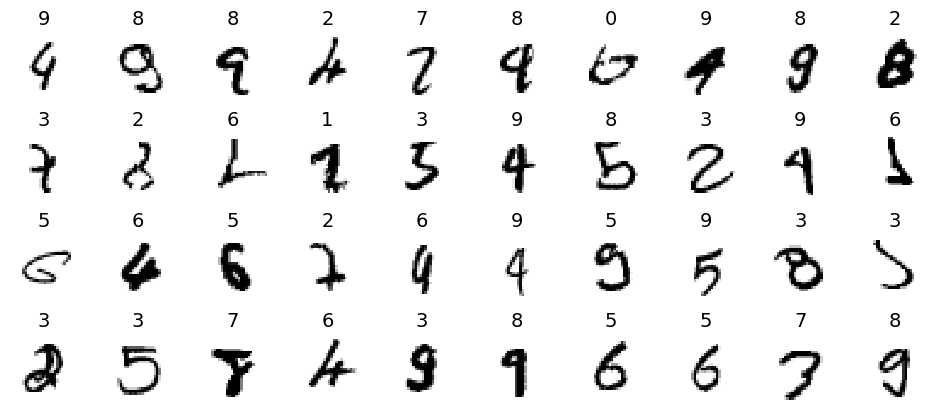

In [ ]:
# Showing the X_test that is misclassified
# and the predicted class
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test_errors[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_pred_errors[index])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

From the textbook

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255, just like we did for Fashion MNIST:

In [166]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

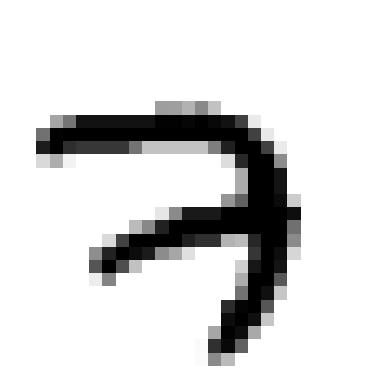

In [167]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [168]:
y_train

array([7, 3, 4, ..., 5, 6, 8], shape=(55000,), dtype=uint8)

In [169]:
X_valid.shape

(5000, 28, 28)

In [170]:
X_test.shape

(10000, 28, 28)

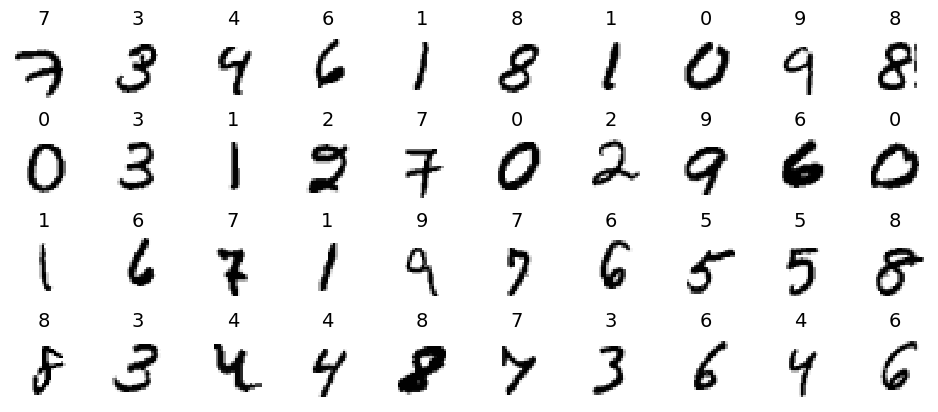

In [171]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Let's build a simple dense network and find the optimal learning rate. We will need a callback to grow the learning rate at each iteration. It will also record the learning rate and the loss at each iteration:

In [172]:
K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_batch_end(self, batch, logs=None):
        lr = self.model.optimizer.learning_rate.numpy() * self.factor
        self.model.optimizer.learning_rate = lr
        self.rates.append(lr)
        self.losses.append(logs["loss"])

In [173]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [174]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

/Users/kevinkyhalim/ML_repo/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


We will start with a small learning rate of 1e-3, and grow it by 0.5% at each iteration:

In [175]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [176]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - accuracy: 0.5283 - loss: nan - val_accuracy: 0.0958 - val_loss: nan


Text(0, 0.5, 'Loss')

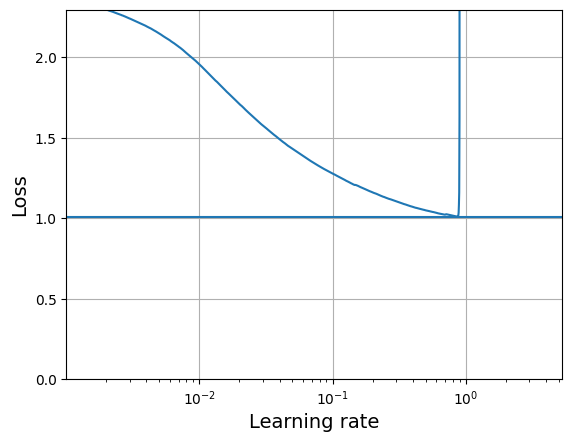

In [177]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [190]:
expon_lr.rates[expon_lr.losses.index(min(expon_lr.losses))]

np.float32(0.861015)

Take the half of the learning rate above

In [198]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [199]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

/Users/kevinkyhalim/ML_repo/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [200]:
optimizer = tf.keras.optimizers.SGD(learning_rate=4e-1)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

In [201]:
run_index = 1 # increment this at every run
run_logdir = Path() / "my_mnist_logs" / "run_{:03d}".format(run_index)
run_logdir

PosixPath('my_mnist_logs/run_001')

In [202]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_mnist_model.keras", save_best_only=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 812us/step - accuracy: 0.8649 - loss: 0.4258 - val_accuracy: 0.9698 - val_loss: 0.1022
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - accuracy: 0.9685 - loss: 0.1038 - val_accuracy: 0.9730 - val_loss: 0.0888
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - accuracy: 0.9798 - loss: 0.0651 - val_accuracy: 0.9748 - val_loss: 0.0929
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step - accuracy: 0.9857 - loss: 0.0462 - val_accuracy: 0.9722 - val_loss: 0.1092
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step - accuracy: 0.9882 - loss: 0.0370 - val_accuracy: 0.9704 - val_loss: 0.1197
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 788us/step - accuracy: 0.9871 - loss: 0.0369 - val_accuracy: 0.9768 - val_loss: 0.0979
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 826us/step - accuracy: 0.9925 - loss: 0.0240 - val_accuracy: 0.9768 - val_loss: 0.1119
Epoch 8/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - accuracy: 

In [203]:
model = tf.keras.models.load_model("my_mnist_model.keras") # rollback to best model
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.9688 - loss: 0.1035


[0.08862045407295227, 0.9725000262260437]

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_mnist_logs
%reload_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 62160), started 0:00:52 ago. (Use '!kill 62160' to kill it.)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir {root_logdir}
%reload_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 59772), started 0:06:11 ago. (Use '!kill 59772' to kill it.)